<a href="https://colab.research.google.com/github/janechange/hello-world/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from keras.datasets import mnist

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation

In [0]:
# When you run it first time, you will download the packages.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# The training sets is included "training datasets and validation datasets"
# The test datasets is the final testing datasets

In [38]:
# 灰階: 0(light)~255(dark)
X_train[:1]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,
           0,   0,   0

In [39]:
y_train[:1]

array([5], dtype=uint8)

In [40]:
X_train[:1, :].shape

(1, 28, 28)

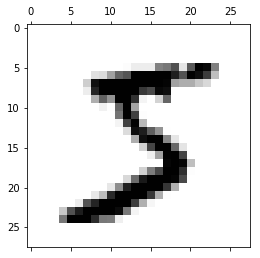

In [41]:
import matplotlib.pyplot as plt
train_img = np.reshape(X_train[:1, :], (28, 28))
plt.matshow(train_img, cmap = plt.get_cmap('binary'))
plt.show()

# Binary: black and white

In [42]:
X_train.shape

(60000, 28, 28)

In [0]:


# Preprocessing
# -1: two dimension 28*28 = one dimension 784
# x = x/255: 0 < x < 1 

X_train = X_train.reshape(X_train.shape[0], -1) / 255
X_test  = X_test.reshape(X_test.shape[0],  -1) / 255 


# One-hot encoding: 0 ~ 9 
# Differentiate the number: if yes, print 1; if not, print 0

y_train = np_utils.to_categorical(y_train, num_classes = 10)
y_test  = np_utils.to_categorical(y_test , num_classes = 10)

In [44]:
y_train.shape

(60000, 10)

In [45]:
X_train[:1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [46]:
y_train[:1]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [47]:
print(X_train.shape)
print(y_train.shape)

(60000, 784)
(60000, 10)


In [0]:
"""
Classifier and Turning hyperparameters
# Keras automatically use GPU to model

"""

import matplotlib.pyplot as plt

# training "batch size"
def train(batch_size):
    model = Sequential()
    model.add(Dense(256, input_dim = 784, activation = 'relu', kernel_initializer = 'normal'))
    model.add(Dense(10, activation = 'softmax', kernel_initializer = 'normal'))
    # Classification: cross entropy; Regression: MSE
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    history = model.fit(X_train, y_train, epochs = 5, batch_size = batch_size, 
                        validation_split = 0.2, verbose = 0)
    #Verbose 0 : no training process; 1: very detailed process
    
    return history

def plot_train_history(history, train_metrics, val_metrics, batch_size):
    plt.plot(history.history.get(train_metrics), '-o')
    plt.plot(history.history.get(  val_metrics), '-o')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
    plt.title('batch_size=' + str(batch_size))
 

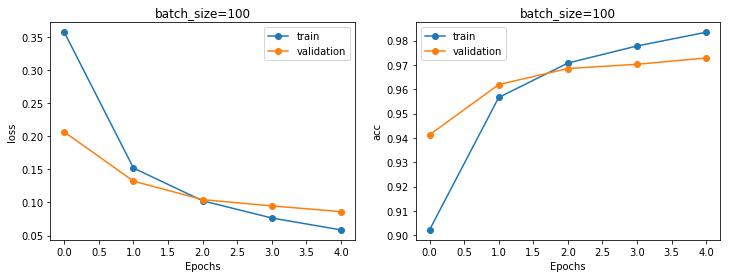

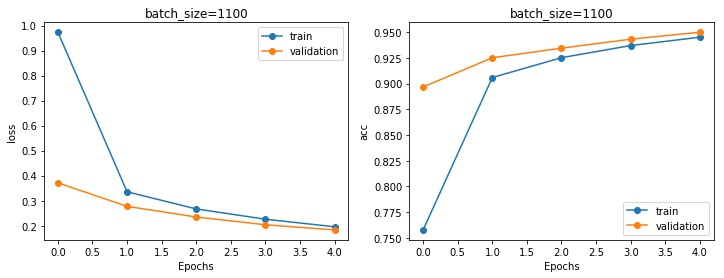

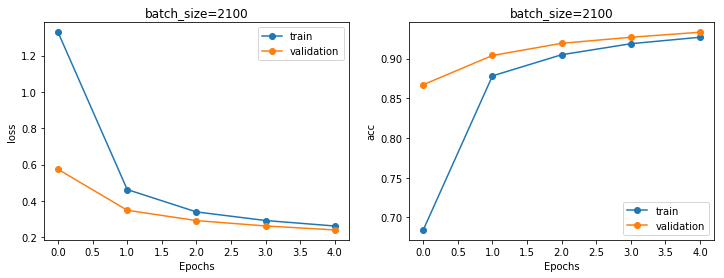

In [58]:
%matplotlib inline
#batch_size_list = np.arange(100, 3000, 1000)
batch_size_list = np.arange(100, 3000, 1000)

#batch_size_list = [1000]

for batch_size in batch_size_list:
    history = train(batch_size)
    
    plt.figure( figsize = (12, 4) )
    plt.subplot(1, 2, 1)
    plot_train_history(history, 'loss', 'val_loss', batch_size)
    
    plt.subplot(1, 2, 2)
    plot_train_history(history, 'acc' , 'val_acc' , batch_size)

    # Small batch size: not easy to converge; large batch size: slow running 

In [0]:
#Now, you can tune other hyperparameters in the same way.


In [59]:

# Keras + sklearn Kfold

#Scikit-Learn website code

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10,6))  #調整作圖大小
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("acc")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



Classifier and Turning hyperparameters
# Keras automatically use GPU to model




In [0]:


def MLP_model():
	model = Sequential()
	model.add(Dense(256, input_dim = 784, activation = 'relu', kernel_initializer = 'normal'))
	model.add(Dense(10, activation = 'softmax', kernel_initializer = 'normal'))
	model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
	return model


Epoch 1/1
10800/10800 [==============================] - 0s 14us/step
Epoch 1/1
21600/21600 [==============================] - 0s 16us/step
Epoch 1/1
32400/32400 [==============================] - 1s 16us/step
Epoch 1/1
43200/43200 [==============================] - 1s 16us/step
Epoch 1/1
54000/54000 [==============================] - 1s 16us/step
Epoch 1/1
10800/10800 [==============================] - 0s 17us/step
Epoch 1/1
21600/21600 [==============================] - 0s 16us/step
Epoch 1/1
32400/32400 [==============================] - 1s 16us/step
Epoch 1/1
43200/43200 [==============================] - 1s 16us/step
Epoch 1/1
54000/54000 [==============================] - 1s 16us/step
Epoch 1/1
10800/10800 [==============================] - 0s 17us/step
Epoch 1/1
21600/21600 [==============================] - 0s 16us/step
Epoch 1/1
32400/32400 [==============================] - 1s 16us/step
Epoch 1/1
43200/43200 [==============================] - 1s 17us/step
Epoch 1/1
54000/5400

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

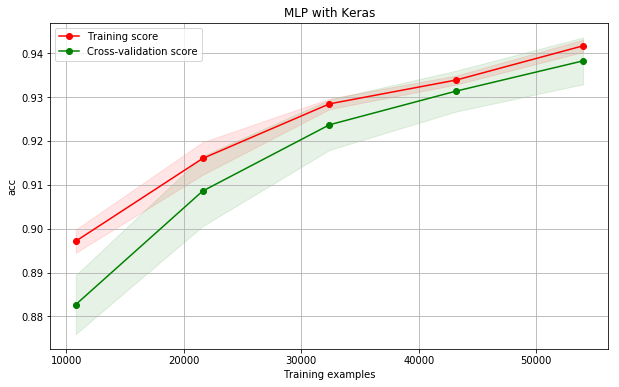

In [67]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold

cv = KFold(n_splits = 10, random_state = None, shuffle = True)
estimator = KerasClassifier(build_fn = MLP_model, nb_epoch = 3, batch_size = 200)

plot_learning_curve(estimator, "MLP with Keras", X_train, y_train, cv = cv, train_sizes = np.linspace(0.2, 1.0, 5))

